In [2]:
import datetime

import IPython.display
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%matplotlib inline

In [15]:
# データウェアハウス

df_aapl = pdr.data.DataReader('AAPL', 'yahoo', '2017-09-01')
df_fb = pdr.data.DataReader('FB', 'yahoo', '2017-09-01')
df_gold = pdr.data.DataReader('GLD', 'yahoo', '2017-09-01')

In [16]:
df_aapl.tail(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-09-25,112.440002,107.669998,108.430000,112.279999,149981400.0,112.279999
2020-09-28,115.320000,112.779999,115.010002,114.959999,137242800.0,114.959999


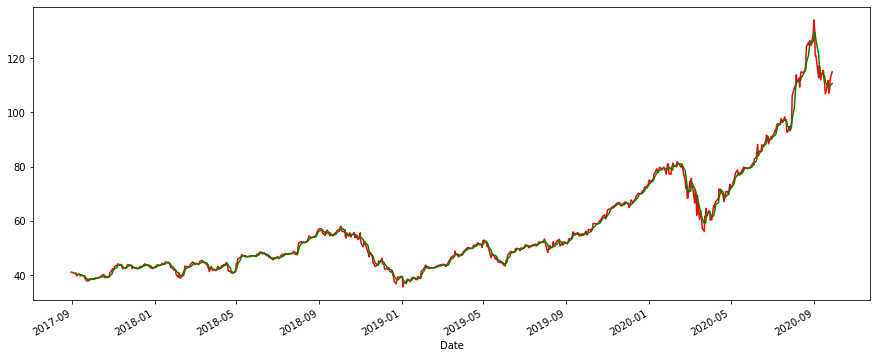

In [17]:
# 統計学 simple moving average

df_aapl['SMA'] = df_aapl['Close'].rolling(window=4).mean()
df_aapl['Close'].plot(figsize=(15,6), color='red')
df_aapl['SMA'].plot(figsize=(15,6), color='green')
plt.show()

In [19]:
# データマイニング

# chnage マーケットの開閉時における価格変動率

df_aapl['change'] = (((df_aapl['Close'] - df_aapl['Open'])) / (df_aapl['Open']) * 100)
df_fb['change'] = (((df_fb['Close'] - df_fb['Open'])) / (df_fb['Open']) * 100)
df_gold['change'] = (((df_gold['Close'] - df_gold['Open'])) / (df_gold['Open']) * 100)
df_aapl.tail(2).round(2)

,High,Low,Open,Close,Volume,Adj Close,SMA,change
Date,,,,,,,,
2020-09-25,112.44,107.67,108.43,112.28,149981400.0,112.28,109.86,3.55
2020-09-28,115.32,112.78,115.01,114.96,137242800.0,114.96,110.65,-0.04


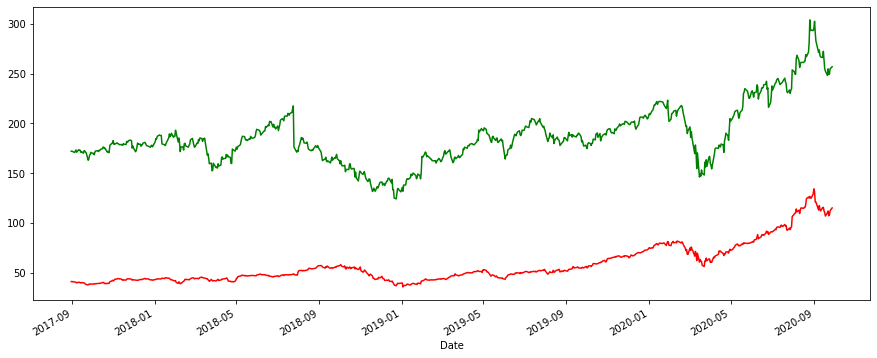

In [21]:
# 値動きが似ていルカ比べる
df_aapl['Close'].plot(figsize=(15,6), color='red')
df_fb['Close'].plot(figsize=(15,6), color='green')
plt.show()

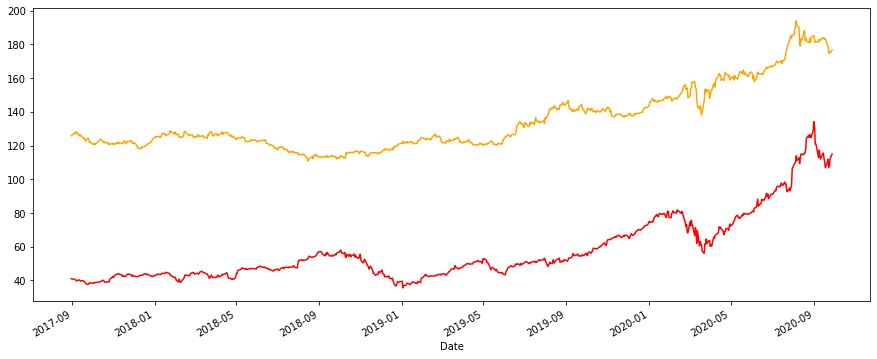

In [24]:
# 値動きが似ていルカ比べる
df_aapl['Close'].plot(figsize=(15,6), color='red')
df_gold['Close'].plot(figsize=(15,6), color='orange')
plt.show()

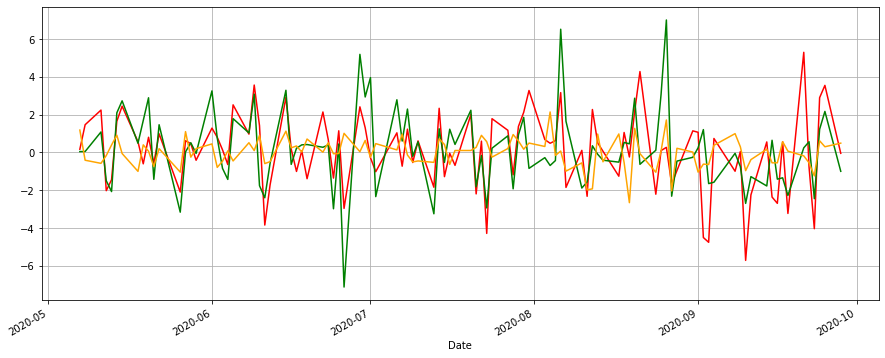

In [26]:
# fbが大きく値動きするのは決算日だろうか?


df_aapl['change'].tail(100).plot(grid=True, figsize=(15,6), color='red')
df_fb['change'].tail(100).plot(grid=True, figsize=(15,6), color='green')
df_gold['change'].tail(100).plot(grid=True, figsize=(15,6), color='orange')
plt.show()

In [27]:
# 機械学習

df_aapl['label'] = df_aapl['Close'].shift(-30) #30日寛シフトさせる
df_aapl.tail(40)

,High,Low,Open,Close,Volume,Adj Close,SMA,change,label
Date,,,,,,,,,
2020-08-03,111.637497,107.892502,108.199997,108.937500,308151200.0,108.741440,101.606876,0.681611,115.540001
2020-08-04,110.790001,108.387497,109.132500,109.665001,173071600.0,109.467628,105.263126,0.487940,112.129997
2020-08-05,110.392502,108.897499,109.377502,110.062500,121992000.0,109.864410,108.731251,0.626269,110.339996
2020-08-06,114.412498,109.797501,110.404999,113.902496,202428800.0,113.697502,110.641874,3.167880,106.839996
2020-08-07,113.675003,110.292503,113.205002,111.112503,198045600.0,111.112503,111.185625,-1.848415,110.080002
2020-08-10,113.775002,110.000000,112.599998,112.727501,212403600.0,112.727501,111.951250,0.113235,111.809998
2020-08-11,112.482498,109.107498,111.970001,109.375000,187902400.0,109.375000,111.779375,-2.317586,107.120003
2020-08-12,113.275002,110.297501,110.497498,113.010002,165944800.0,113.010002,111.556252,2.273811,108.220001
2020-08-13,116.042503,113.927498,114.430000,115.010002,210082000.0,115.010002,112.530626,0.506862,112.279999


In [30]:
# 30日後の株価の値を予測する

# ラベルを削除
X = np.array(df_aapl.drop(['label', 'SMA'], axis=1))

#とりうる値の大小が著しく異なる特徴量をいれると結果が悪くな流ので、平均を引いて、標準偏差で割ってスケーリング数r
X = sklearn.preprocessing.scale(X)

# 予測に使う過去30日寛のデータ
predict_data = X[-30:]

# 過去30日を取り除いた入力データ
X = X[:-30]
y = np.array(df_aapl['label'])
# 過去30日を取り除いた正解ラベル
y = y[:-30]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

lr = LinearRegression()
lr.fit(X_train, y_train)

accuracy = lr.score(X_test, y_test)
accuracy


0.8852838912288691

In [32]:
# 予測する

predicted_data = lr.predict(predict_data)
predicted_data

array([123.06207319, 124.17028744, 124.1761801 , 126.37559691,
       129.27748148, 130.80092542, 131.92012742, 134.22969026,
       132.42572646, 132.44946282, 135.31731474, 141.06825425,
       135.98007042, 126.49671684, 123.42926932, 119.71874752,
       124.64654818, 119.92709633, 119.01194148, 123.15168396,
       122.42087817, 120.01572452, 118.0217909 , 113.12991833,
       116.15097732, 118.99515738, 114.80534414, 115.62047629,
       119.56975699, 122.90463693])

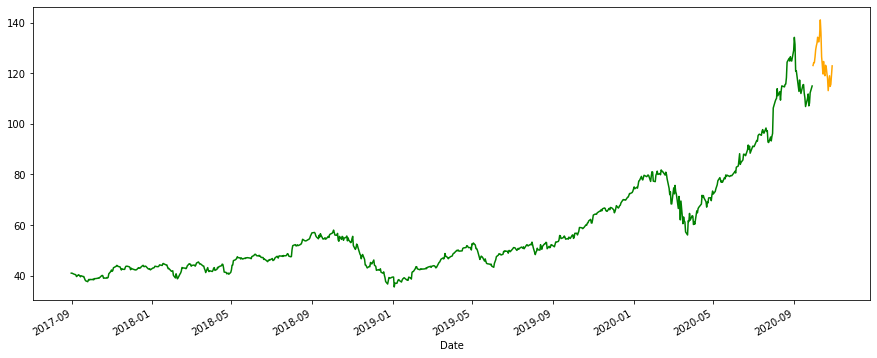

In [35]:
df_aapl['Predict'] = np.nan

last_date = df_aapl.iloc[-1].name

one_day = 86400 #second
next_unix = last_date.timestamp() + one_day

for data in predicted_data:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df_aapl.loc[next_date] = np.append([np.nan]* (len(df_aapl.columns)-1), data)

df_aapl['Close'].plot(figsize=(15,6), color="green")
df_aapl['Predict'].plot(figsize=(15,6), color="orange")
plt.show()

In [ ]:
# ディープラーニング
